In [1]:
#imports
import pandas as pd #Python data analysis library
import numpy as np #Python scientific computing
# from mlxtend.frequent_patterns import apriori
# from mlxtend.frequent_patterns import association_rules

In [2]:
#import dataset
train = pd.read_csv(r'order_products__train.csv')

In [5]:
train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [6]:
order = pd.read_csv(r'orders.csv')

In [7]:
order

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [8]:
dep = pd.read_csv(r'departments.csv')
aisle = pd.read_csv(r'aisles.csv')
product = pd.read_csv(r'products.csv')

In [9]:
dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [10]:
aisle

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [11]:
product

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [12]:
prior = pd.read_csv(r'order_products__prior.csv')

In [13]:
prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


We will merge the prior and train dataset to get the complete order dataset. We will use append() for doing so.

In [14]:
train_prior = train.append(prior,ignore_index = True)

In [15]:
train_prior

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
33819101,3421083,39678,6,1
33819102,3421083,11352,7,0
33819103,3421083,4600,8,0
33819104,3421083,24852,9,1


For counting each product, we can assign reordered column as 1

In [16]:
train_prior['reordered'] = 1 

In [17]:
train_prior

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,1
3,1,49683,4,1
4,1,43633,5,1
...,...,...,...,...
33819101,3421083,39678,6,1
33819102,3421083,11352,7,1
33819103,3421083,4600,8,1
33819104,3421083,24852,9,1


In [18]:
productCountDf = train_prior.groupby("product_id",as_index = False)["order_id"].count()

In [19]:
productCountDf

,product_id,order_id
0,1,1928
1,2,94
2,3,283
3,4,351
4,5,16
...,...,...
49680,49684,9
49681,49685,49
49682,49686,127
49683,49687,14


In [20]:
newproductCountDf=productCountDf.merge(product, left_on='product_id', right_on='product_id', how='inner')


In [21]:
newproductCountDf

,product_id,order_id,product_name,aisle_id,department_id
0,1,1928,Chocolate Sandwich Cookies,61,19
1,2,94,All-Seasons Salt,104,13
2,3,283,Robust Golden Unsweetened Oolong Tea,94,7
3,4,351,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,16,Green Chile Anytime Sauce,5,13
...,...,...,...,...,...
49680,49684,9,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49681,49685,49,En Croute Roast Hazelnut Cranberry,42,1
49682,49686,127,Artisan Baguette,112,3
49683,49687,14,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [22]:
prod= newproductCountDf[['product_id','product_name']]
prod

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce
...,...,...
49680,49684,"Vodka, Triple Distilled, Twist of Vanilla"
49681,49685,En Croute Roast Hazelnut Cranberry
49682,49686,Artisan Baguette
49683,49687,Smartblend Healthy Metabolism Dry Cat Food


In [24]:
#Top 200 most frequently purchased products
topLev = 350
productCountDf = productCountDf.sort_values("order_id",ascending = False)
topProdFrame = productCountDf.iloc[0:topLev,:]
productId= topProdFrame.loc[:,["product_id"]]


In [25]:
productId

,product_id
24849,24852
13173,13176
21134,21137
21900,21903
47205,47209
...,...
3375,3376
35137,35140
7172,7175
19703,19706


In [26]:
topProdFrame

,product_id,order_id
24849,24852,491291
13173,13176,394930
21134,21137,275577
21900,21903,251705
47205,47209,220877
...,...,...
3375,3376,13330
35137,35140,13292
7172,7175,13215
19703,19706,13189


Now we will filter the orders and get orders containting the the most frequently purchased products

In [27]:
df_top = train_prior[0:0]
for i in range(0,350):
    pId = productId.iloc[i]['product_id'] 
    stDf = train_prior[train_prior.product_id == pId ]
    df_top = df_top.append(stDf,ignore_index = False)

In [28]:
df_top


,order_id,product_id,add_to_cart_order,reordered
115,226,24852,2,1
156,473,24852,2,1
196,878,24852,2,1
272,1042,24852,1,1
297,1139,24852,1,1
...,...,...,...,...
33811004,3420251,12916,14,1
33811060,3420259,12916,1,1
33812820,3420429,12916,14,1
33814916,3420648,12916,8,1


Now we need to consolidate the items into 1 transaction per row with each product 1 hot encoded. Each row will represent an order and each column will represent product_id. If the cell value is '1' say (i,j) then ith order contains jth product.

In [29]:
prod

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce
...,...,...
49680,49684,"Vodka, Triple Distilled, Twist of Vanilla"
49681,49685,En Croute Roast Hazelnut Cranberry
49682,49686,Artisan Baguette
49683,49687,Smartblend Healthy Metabolism Dry Cat Food


In [30]:
df_top=df_top.merge(prod, left_on='product_id', right_on='product_id', how='inner')
df_top=df_top[['order_id','add_to_cart_order','reordered','product_name']]
df_top

,order_id,add_to_cart_order,reordered,product_name
0,226,2,1,Banana
1,473,2,1,Banana
2,878,2,1,Banana
3,1042,1,1,Banana
4,1139,1,1,Banana
...,...,...,...,...
12740499,3420251,14,1,Ginger Ale
12740500,3420259,1,1,Ginger Ale
12740501,3420429,14,1,Ginger Ale
12740502,3420648,8,1,Ginger Ale


In [31]:
df_top.isnull().sum()

order_id             0
add_to_cart_order    0
reordered            0
product_name         0
dtype: int64

In [32]:
basket = df_top.groupby(['order_id', 'product_name'])['reordered'].sum().unstack().reset_index().fillna(0).set_index('order_id')

In [33]:
basket

product_name,0% Greek Strained Yogurt,1% Lowfat Milk,100 Calorie Per Bag Popcorn,100% Raw Coconut Water,100% Recycled Paper Towels,100% Whole Wheat Bread,2% Reduced Fat DHA Omega-3 Reduced Fat Milk,2% Reduced Fat Milk,2% Reduced Fat Organic Milk,Air Chilled Organic Boneless Skinless Chicken Breasts,...,Watermelon Chunks,Whipped Cream Cheese,White Corn,White Onion,Whole Milk,Whole Milk Plain Yogurt,XL Emerald White Seedless Grapes,Yellow Bell Pepper,Yellow Onions,"YoKids Squeezers Organic Low-Fat Yogurt, Strawberry"
order_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3421080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3421081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


basket.to_csv('basket_350.csv')

In [ ]:
basket_350 = pd.read_csv(r'basket_350.csv')

In [36]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [38]:

basket_sets = basket.applymap(encode_units)

In [39]:
basket_sets 

product_name,0% Greek Strained Yogurt,1% Lowfat Milk,100 Calorie Per Bag Popcorn,100% Raw Coconut Water,100% Recycled Paper Towels,100% Whole Wheat Bread,2% Reduced Fat DHA Omega-3 Reduced Fat Milk,2% Reduced Fat Milk,2% Reduced Fat Organic Milk,Air Chilled Organic Boneless Skinless Chicken Breasts,...,Watermelon Chunks,Whipped Cream Cheese,White Corn,White Onion,Whole Milk,Whole Milk Plain Yogurt,XL Emerald White Seedless Grapes,Yellow Bell Pepper,Yellow Onions,"YoKids Squeezers Organic Low-Fat Yogurt, Strawberry"
order_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3421080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3421081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
basket_sets.to_csv('basket_350_bin.csv')

In [2]:
basket_350 = pd.read_csv(r'basket_350_bin.csv')

In [3]:
basket_350

,order_id,0% Greek Strained Yogurt,1% Lowfat Milk,100 Calorie Per Bag Popcorn,100% Raw Coconut Water,100% Recycled Paper Towels,100% Whole Wheat Bread,2% Reduced Fat DHA Omega-3 Reduced Fat Milk,2% Reduced Fat Milk,2% Reduced Fat Organic Milk,...,Watermelon Chunks,Whipped Cream Cheese,White Corn,White Onion,Whole Milk,Whole Milk Plain Yogurt,XL Emerald White Seedless Grapes,Yellow Bell Pepper,Yellow Onions,"YoKids Squeezers Organic Low-Fat Yogurt, Strawberry"
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2823113,3421078,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2823114,3421080,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2823115,3421081,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2823116,3421082,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
basket_350= basket_350.iloc[: , 1:]

# Basket_sets wurde für die mlxtend Implementierung angepasst

# PyFim

# wir passen der basket_sets für die PyFim Implementierung wie folgend:

In [5]:
for col in basket_350:
    basket_350[col]=basket_350[col].replace(1, basket_350[col].name)

/tmp/ipykernel_2267/2507543859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basket_350[col]=basket_350[col].replace(1, basket_350[col].name)


In [6]:
for col in basket_350:
    basket_350[col]=basket_350[col].replace(0, np.nan)

/tmp/ipykernel_2267/4281057543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basket_350[col]=basket_350[col].replace(0, np.nan)


In [8]:
  basket_350

,0% Greek Strained Yogurt,1% Lowfat Milk,100 Calorie Per Bag Popcorn,100% Raw Coconut Water,100% Recycled Paper Towels,100% Whole Wheat Bread,2% Reduced Fat DHA Omega-3 Reduced Fat Milk,2% Reduced Fat Milk,2% Reduced Fat Organic Milk,Air Chilled Organic Boneless Skinless Chicken Breasts,...,Watermelon Chunks,Whipped Cream Cheese,White Corn,White Onion,Whole Milk,Whole Milk Plain Yogurt,XL Emerald White Seedless Grapes,Yellow Bell Pepper,Yellow Onions,"YoKids Squeezers Organic Low-Fat Yogurt, Strawberry"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Air Chilled Organic Boneless Skinless Chicken ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2% Reduced Fat Milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2823113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2823114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2823115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2823116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
basket_sets.to_csv('basket_350_bin.csv')

NameError: name 'basket_sets' is not defined

In [ ]:
basket_350 = pd.read_csv(r'basket_350_bin.csv')

In [8]:
trans=basket_350.count(axis=1)

In [9]:
trans.to_csv('trans_350.csv')

In [11]:
trans_350 = pd.read_csv(r'trans_350.csv', na_values='-')

In [12]:
trans_350

,Unnamed: 0,0
0,0,5
1,1,3
2,2,5
3,3,1
4,4,6
...,...,...
2823113,2823113,4
2823114,2823114,3
2823115,2823115,1
2823116,2823116,2


In [13]:
trans_350.columns = ['trans', 'count_items']

In [14]:
trans_350

,trans,count_items
0,0,5
1,1,3
2,2,5
3,3,1
4,4,6
...,...,...
2823113,2823113,4
2823114,2823114,3
2823115,2823115,1
2823116,2823116,2


In [15]:
trans_350.sort_values(by=["count_items"],ascending=False).head(50)

,trans,count_items
1290574,1290574,48
1428104,1428104,42
641325,641325,42
494063,494063,41
2733754,2733754,39
671149,671149,38
574620,574620,38
2281934,2281934,37
1386059,1386059,37
106818,106818,37


In [15]:
data_fim_merge = pd.concat([basket_350, trans_350], axis=1)

In [16]:
data_fim_merge

,0% Greek Strained Yogurt,1% Lowfat Milk,100 Calorie Per Bag Popcorn,100% Raw Coconut Water,100% Recycled Paper Towels,100% Whole Wheat Bread,2% Reduced Fat DHA Omega-3 Reduced Fat Milk,2% Reduced Fat Milk,2% Reduced Fat Organic Milk,Air Chilled Organic Boneless Skinless Chicken Breasts,...,White Corn,White Onion,Whole Milk,Whole Milk Plain Yogurt,XL Emerald White Seedless Grapes,Yellow Bell Pepper,Yellow Onions,"YoKids Squeezers Organic Low-Fat Yogurt, Strawberry",trans,count_items
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Air Chilled Organic Boneless Skinless Chicken ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,5
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2% Reduced Fat Milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2823113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2823113,4
2823114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2823114,3
2823115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2823115,1
2823116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2823116,2


data_fim_merge.to_csv('data_merge_350.csv')

In [ ]:
trans_350 = pd.read_csv(r'data_merge_350.csv', na_values='-')

In [4]:
trans_350= trans_350.iloc[: , 1:]

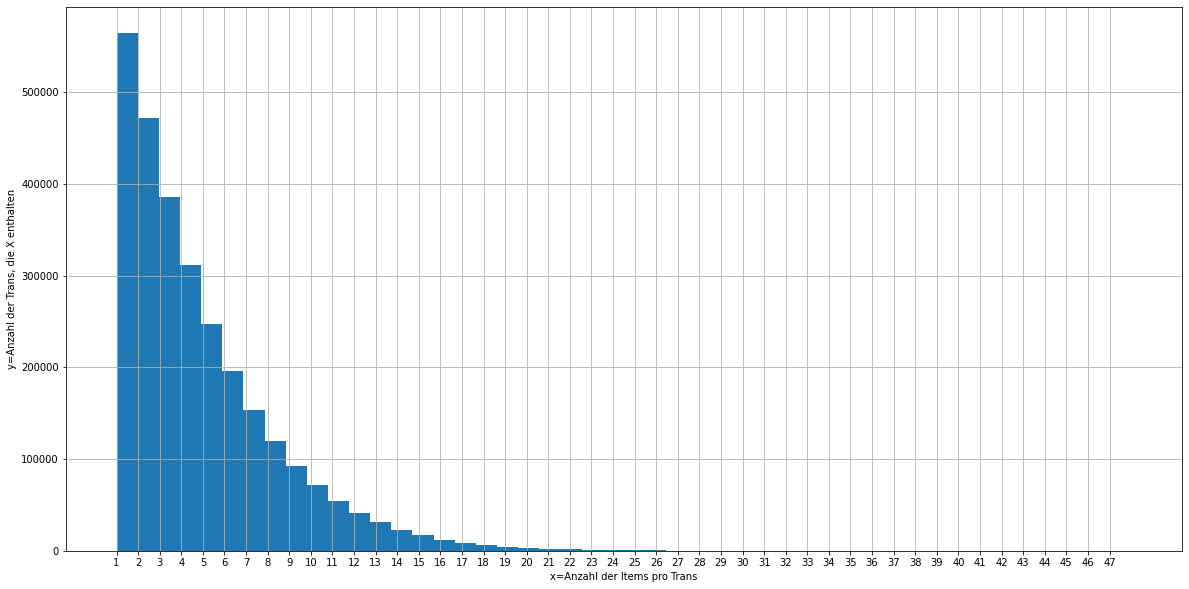

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
plt.rcParams['figure.figsize'] = [20, 10]
plt.hist(trans_350['count_items'], bins=48, alpha=1, orientation='vertical')
plt.xlabel('x=Anzahl der Items pro Trans')
plt.ylabel('y=Anzahl der Trans, die X enthalten')
plt.grid(True)
plt.xticks([x for x in range(1, 48, 1)])
plt.show()

In [5]:
trans_350

,0% Greek Strained Yogurt,1% Lowfat Milk,100 Calorie Per Bag Popcorn,100% Raw Coconut Water,100% Recycled Paper Towels,100% Whole Wheat Bread,2% Reduced Fat DHA Omega-3 Reduced Fat Milk,2% Reduced Fat Milk,2% Reduced Fat Organic Milk,Air Chilled Organic Boneless Skinless Chicken Breasts,...,White Corn,White Onion,Whole Milk,Whole Milk Plain Yogurt,XL Emerald White Seedless Grapes,Yellow Bell Pepper,Yellow Onions,"YoKids Squeezers Organic Low-Fat Yogurt, Strawberry",trans,count_items
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Air Chilled Organic Boneless Skinless Chicken ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,5
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2% Reduced Fat Milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2823113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2823113,4
2823114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2823114,3
2823115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2823115,1
2823116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2823116,2


In [6]:
trans_350 = trans_350.iloc[:, :-1]

In [ ]:
trans_350 = trans_350.iloc[:, :-1]

In [7]:
trans_350

,0% Greek Strained Yogurt,1% Lowfat Milk,100 Calorie Per Bag Popcorn,100% Raw Coconut Water,100% Recycled Paper Towels,100% Whole Wheat Bread,2% Reduced Fat DHA Omega-3 Reduced Fat Milk,2% Reduced Fat Milk,2% Reduced Fat Organic Milk,Air Chilled Organic Boneless Skinless Chicken Breasts,...,Watermelon Chunks,Whipped Cream Cheese,White Corn,White Onion,Whole Milk,Whole Milk Plain Yogurt,XL Emerald White Seedless Grapes,Yellow Bell Pepper,Yellow Onions,"YoKids Squeezers Organic Low-Fat Yogurt, Strawberry"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Air Chilled Organic Boneless Skinless Chicken ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2% Reduced Fat Milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2614880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2614881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2614882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
trans_350['items'] = trans_350[trans_350.columns[1:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

trans_350.columns=[int(i) for i in range (0,351)]

data_fim.reset_index(drop=True, inplace=True)

In [9]:
trans_350 = trans_350.iloc[: , 350:]

In [2]:
trans_350_items = pd.read_csv(r'trans_350_items.csv', na_values='-')

In [3]:
trans_350_items=trans_350_items.drop(columns='Unnamed: 0', axis=1)

In [4]:
trans_350_items

,items
0,"Bag of Organic Bananas,Cucumber Kirby,Organic ..."
1,"Carrots,Michigan Organic Kale,Organic Egg Whites"
2,Air Chilled Organic Boneless Skinless Chicken ...
3,Original Orange Juice
4,"2% Reduced Fat Milk,Bag of Organic Bananas,Cle..."
...,...
2823113,"Banana,Guacamole,Honey Nut Cheerios,Organic Ga..."
2823114,"Organic Cilantro,Organic Tomato Cluster,Organi..."
2823115,Lime Sparkling Water
2823116,"Raspberries,Strawberries"


In [5]:
trans_350_items= trans_350_items.dropna(how="all")

In [6]:
data_arr=trans_350_items.to_numpy()

In [7]:
data_arr

array([['Bag of Organic Bananas,Cucumber Kirby,Organic Celery Hearts,Organic Hass Avocado,Organic Whole String Cheese'],
       ['Carrots,Michigan Organic Kale,Organic Egg Whites'],
       ['Air Chilled Organic Boneless Skinless Chicken Breasts,Organic Baby Spinach,Organic Ginger Root,Total 2% with Strawberry Lowfat Greek Strained Yogurt,Unsweetened Almondmilk'],
       ...,
       ['Lime Sparkling Water'],
       ['Raspberries,Strawberries'],
       ['Banana']], dtype=object)

In [8]:
data_arr2 = data_arr.tolist()

In [9]:
data_arr2

[['Bag of Organic Bananas,Cucumber Kirby,Organic Celery Hearts,Organic Hass Avocado,Organic Whole String Cheese'],
 ['Carrots,Michigan Organic Kale,Organic Egg Whites'],
 ['Air Chilled Organic Boneless Skinless Chicken Breasts,Organic Baby Spinach,Organic Ginger Root,Total 2% with Strawberry Lowfat Greek Strained Yogurt,Unsweetened Almondmilk'],
 ['Original Orange Juice'],
 ['2% Reduced Fat Milk,Bag of Organic Bananas,Clementines,Mini Original Babybel Cheese,Organic Hass Avocado,Organic Raspberries'],
 ['Orange Juice,Pineapple Chunks'],
 ['Baby Spinach,Distilled Water,Extra Virgin Olive Oil,Green Beans,Organic Bread with 21 Whole Grains,Organic Red Radish, Bunch,Vanilla Almond Breeze Almond Milk'],
 ['Banana,Green Beans,Organic Avocado,Organic Black Beans,Organic Cilantro,Organic Half & Half,Organic Strawberries,Yellow Onions'],
 ['Extra Virgin Olive Oil'],
 ['Cherubs Heavenly Salad Tomatoes'],
 ['Lemonade,Soda,Sparkling Natural Mineral Water'],
 ['Honeycrisp Apple,Organic Broccoli Flo

In [10]:
for i in range(len(data_arr2)):
	data_arr2[i] = data_arr2[i][0].split(",")

In [11]:
data_arr2

[['Bag of Organic Bananas',
  'Cucumber Kirby',
  'Organic Celery Hearts',
  'Organic Hass Avocado',
  'Organic Whole String Cheese'],
 ['Carrots', 'Michigan Organic Kale', 'Organic Egg Whites'],
 ['Air Chilled Organic Boneless Skinless Chicken Breasts',
  'Organic Baby Spinach',
  'Organic Ginger Root',
  'Total 2% with Strawberry Lowfat Greek Strained Yogurt',
  'Unsweetened Almondmilk'],
 ['Original Orange Juice'],
 ['2% Reduced Fat Milk',
  'Bag of Organic Bananas',
  'Clementines',
  'Mini Original Babybel Cheese',
  'Organic Hass Avocado',
  'Organic Raspberries'],
 ['Orange Juice', 'Pineapple Chunks'],
 ['Baby Spinach',
  'Distilled Water',
  'Extra Virgin Olive Oil',
  'Green Beans',
  'Organic Bread with 21 Whole Grains',
  'Organic Red Radish',
  ' Bunch',
  'Vanilla Almond Breeze Almond Milk'],
 ['Banana',
  'Green Beans',
  'Organic Avocado',
  'Organic Black Beans',
  'Organic Cilantro',
  'Organic Half & Half',
  'Organic Strawberries',
  'Yellow Onions'],
 ['Extra Virgin

In [12]:
from sys import argv
from fim import apriori, eclat, fpgrowth, fim

In [ ]:
import time
l=[0.0001]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=1
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        count=0
        for r in eclat(data_arr2, supp=i, zmin=1):
            count+=1
        print(count)
        t2=time.perf_counter()
        #count+=1
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)

In [15]:
import time
l=[0.00001]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=1
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        count=0
        for r in apriori(data_arr2, supp=i, zmin=1):
            count+=1
        print(count)
        t2=time.perf_counter()
        #count+=1
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)

Testing with minsupp of:::::::::::::::::::: 1e-05
133819577
123962.22448899789


In [16]:
import time
l=[0.00001]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=1
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        count=0
        for r in fpgrowth(data_arr2, supp=i, zmin=1):
            count+=1
        print(count)
        t2=time.perf_counter()
        #count+=1
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)

Testing with minsupp of:::::::::::::::::::: 1e-05
133819577
86264.42817600037


In [14]:
import time
l=[0.0001,0.0002,0.0003,0.0004,0.0005]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=1
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        count=0
        for r in eclat(data_arr2, supp=i, zmin=1):
            count+=1
        print(count)
        t2=time.perf_counter()
        #count+=1
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)

Testing with minsupp of:::::::::::::::::::: 0.0001
6995519
9533.655858000202
Testing with minsupp of:::::::::::::::::::: 0.0002
2505373
7093.881138999677
Testing with minsupp of:::::::::::::::::::: 0.0003
1707015
6255.1591610003925
Testing with minsupp of:::::::::::::::::::: 0.0004
1130918
6299.729709000076
Testing with minsupp of:::::::::::::::::::: 0.0005
834474
5567.128048000086


In [15]:
import time
l=[0.0001,0.0002,0.0003,0.0004,0.0005]
f=[]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=1
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        fpgrowth(data_arr2, supp=i, zmin=1)
        t2=time.perf_counter()
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)
    f.append(d)
   

Testing with minsupp of:::::::::::::::::::: 0.0001
8591.725624999981
Testing with minsupp of:::::::::::::::::::: 0.0002
6137.689886000317
Testing with minsupp of:::::::::::::::::::: 0.0003
5846.998995999911
Testing with minsupp of:::::::::::::::::::: 0.0004
5363.074969000081
Testing with minsupp of:::::::::::::::::::: 0.0005
4909.423745999902


In [16]:
import time
l=[0.0001,0.0002,0.0003,0.0004,0.0005]
a=[]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=1
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        apriori(data_arr2, supp=i, zmin=1)
        t2=time.perf_counter()
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)
    a.append(d)

Testing with minsupp of:::::::::::::::::::: 0.0001
16338.643328000217
Testing with minsupp of:::::::::::::::::::: 0.0002
10113.659907000056
Testing with minsupp of:::::::::::::::::::: 0.0003
9694.345791999694
Testing with minsupp of:::::::::::::::::::: 0.0004
8229.947761999938
Testing with minsupp of:::::::::::::::::::: 0.0005
7842.951130000074


In [17]:
import time
l=[0.0001,0.0002,0.0003,0.0004,0.0005]
e=[]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=1
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        eclat(data_arr2, supp=i, zmin=1)
        t2=time.perf_counter()
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)
    e.append(d)

Testing with minsupp of:::::::::::::::::::: 0.0001
9357.339054000022
Testing with minsupp of:::::::::::::::::::: 0.0002
6806.077508999806
Testing with minsupp of:::::::::::::::::::: 0.0003
6383.582737999859
Testing with minsupp of:::::::::::::::::::: 0.0004
6359.260332999838
Testing with minsupp of:::::::::::::::::::: 0.0005
6237.380878000295


Text(0, 0.5, 'Run Time in ms')

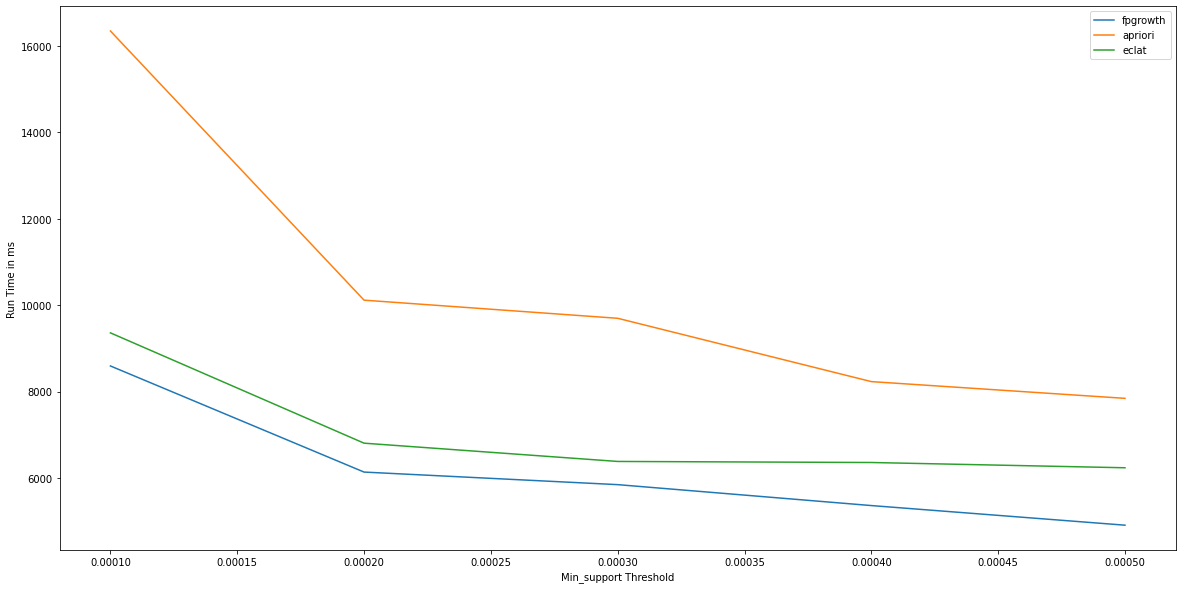

In [18]:
import matplotlib.pyplot as plt
import matplotlib
#import squarify
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=a,label="apriori")
sns.lineplot(x=l,y=e,label="eclat")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")
#plt.yscale('log')

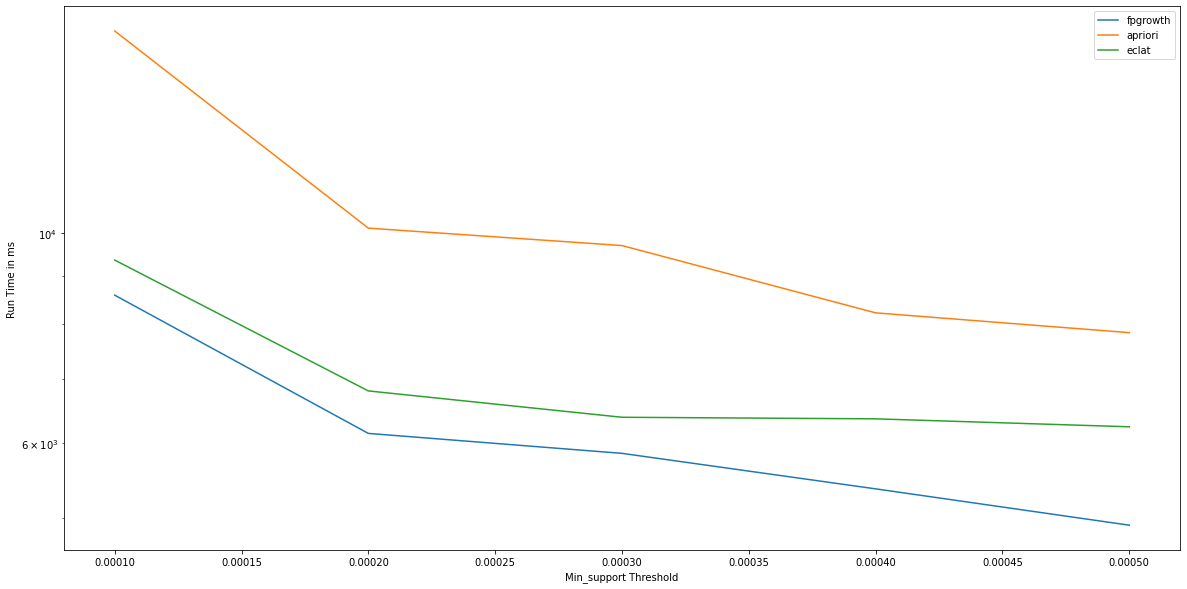

In [19]:
import matplotlib.pyplot as plt
import matplotlib
#import squarify
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=a,label="apriori")
sns.lineplot(x=l,y=e,label="eclat")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")
plt.yscale('log')

In [20]:
import time
l=[0.001,0.002,0.003,0.004,0.005]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=1
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        count=0
        for r in eclat(data_arr2, supp=i, zmin=1):
            count+=1
        print(count)
        t2=time.perf_counter()
        #count+=1
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)

Testing with minsupp of:::::::::::::::::::: 0.001
375820
6047.517958000299
Testing with minsupp of:::::::::::::::::::: 0.002
175248
5813.814442999956
Testing with minsupp of:::::::::::::::::::: 0.003
112855
5571.536222999839
Testing with minsupp of:::::::::::::::::::: 0.004
82277
5579.714178999893
Testing with minsupp of:::::::::::::::::::: 0.005
64549
5558.86577199999


In [21]:
import time
l=[0.001,0.002,0.003,0.004,0.005]
f=[]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=1
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        fpgrowth(data_arr2, supp=i, zmin=1)
        t2=time.perf_counter()
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)
    f.append(d)
   

Testing with minsupp of:::::::::::::::::::: 0.001
5558.6927330000435
Testing with minsupp of:::::::::::::::::::: 0.002
5308.861989000434
Testing with minsupp of:::::::::::::::::::: 0.003
4943.235283999911
Testing with minsupp of:::::::::::::::::::: 0.004
5088.7341560001005
Testing with minsupp of:::::::::::::::::::: 0.005
4929.914801999985


In [22]:
import time
l=[0.001,0.002,0.003,0.004,0.005]
a=[]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=1
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        apriori(data_arr2, supp=i, zmin=1)
        t2=time.perf_counter()
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)
    a.append(d)

Testing with minsupp of:::::::::::::::::::: 0.001
7807.9569090000405
Testing with minsupp of:::::::::::::::::::: 0.002
6263.769860000139
Testing with minsupp of:::::::::::::::::::: 0.003
6052.91708499999
Testing with minsupp of:::::::::::::::::::: 0.004
5850.543968999773
Testing with minsupp of:::::::::::::::::::: 0.005
5684.605578999708


In [23]:
import time
l=[0.001,0.002,0.003,0.004,0.005]
e=[]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=1
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        eclat(data_arr2, supp=i, zmin=1)
        t2=time.perf_counter()
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)
    e.append(d)

Testing with minsupp of:::::::::::::::::::: 0.001
6155.355095000232
Testing with minsupp of:::::::::::::::::::: 0.002
5908.076170000186
Testing with minsupp of:::::::::::::::::::: 0.003
5780.6107830001565
Testing with minsupp of:::::::::::::::::::: 0.004
5485.161678999702
Testing with minsupp of:::::::::::::::::::: 0.005
5287.574380000024


Text(0, 0.5, 'Run Time in ms')

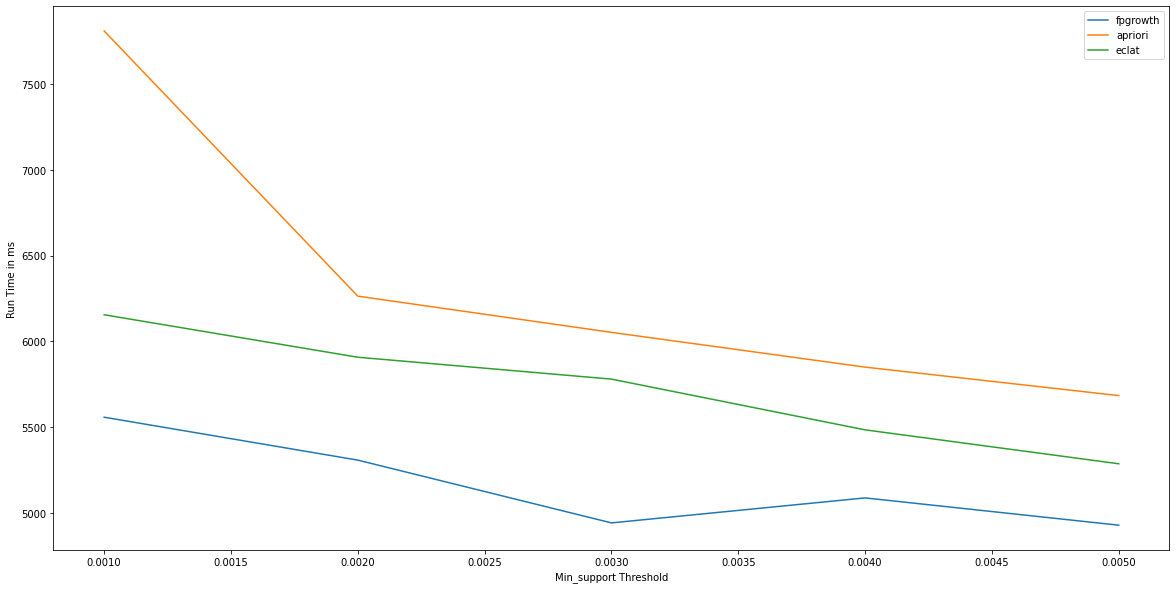

In [24]:
import matplotlib.pyplot as plt
import matplotlib
#import squarify
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=a,label="apriori")
sns.lineplot(x=l,y=e,label="eclat")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")
#plt.yscale('log')

In [13]:
import time
l=[0.01,0.02,0.03,0.04,0.05]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=1
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        count=0
        for r in eclat(data_arr2, supp=i, zmin=1):
            count+=1
        print(count)
        t2=time.perf_counter()
        #count+=1
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)

Testing with minsupp of:::::::::::::::::::: 0.01
29162
6278.612651000003
Testing with minsupp of:::::::::::::::::::: 0.02
12051
4935.100757000328
Testing with minsupp of:::::::::::::::::::: 0.03
7155
4526.9945959989855
Testing with minsupp of:::::::::::::::::::: 0.04
4948
4232.246593997843
Testing with minsupp of:::::::::::::::::::: 0.05
3678
4185.277049997239


In [15]:
import time
l=[0.01,0.02,0.03,0.04,0.05]
f=[]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=1
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        fpgrowth(data_arr2, supp=i, zmin=1)
        t2=time.perf_counter()
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)
    f.append(d)
   

Testing with minsupp of:::::::::::::::::::: 0.01
4240.902198002004
Testing with minsupp of:::::::::::::::::::: 0.02
4033.6636460015143
Testing with minsupp of:::::::::::::::::::: 0.03
4027.695944001607
Testing with minsupp of:::::::::::::::::::: 0.04
3923.9511560008395
Testing with minsupp of:::::::::::::::::::: 0.05
4999.167207002756


In [16]:
import time
l=[0.01,0.02,0.03,0.04,0.05]
a=[]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=1
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        apriori(data_arr2, supp=i, zmin=1)
        t2=time.perf_counter()
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)
    a.append(d)

Testing with minsupp of:::::::::::::::::::: 0.01
5261.90945000053
Testing with minsupp of:::::::::::::::::::: 0.02
5486.4100529994175
Testing with minsupp of:::::::::::::::::::: 0.03
4868.687655998656
Testing with minsupp of:::::::::::::::::::: 0.04
4272.893969002325
Testing with minsupp of:::::::::::::::::::: 0.05
4964.030123999692


In [17]:
import time
l=[0.01,0.02,0.03,0.04,0.05]
e=[]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=1
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        eclat(data_arr2, supp=i, zmin=1)
        t2=time.perf_counter()
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)
    e.append(d)

Testing with minsupp of:::::::::::::::::::: 0.01
4480.483613002434
Testing with minsupp of:::::::::::::::::::: 0.02
5299.838640999951
Testing with minsupp of:::::::::::::::::::: 0.03
4307.792553998297
Testing with minsupp of:::::::::::::::::::: 0.04
4193.806343999313
Testing with minsupp of:::::::::::::::::::: 0.05
4131.019972999638


Text(0, 0.5, 'Run Time in ms')

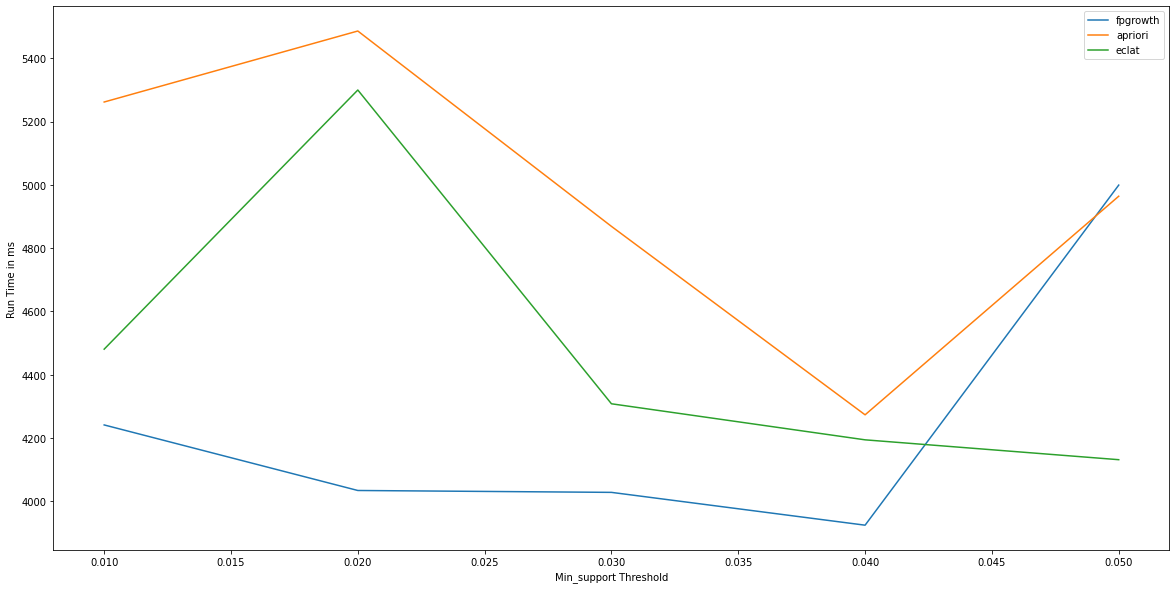

In [18]:
import matplotlib.pyplot as plt
import matplotlib
#import squarify
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=a,label="apriori")
sns.lineplot(x=l,y=e,label="eclat")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")
#plt.yscale('log')

In [19]:
import time
l=[0.1,0.2,0.3,0.4,0.5]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=1
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        count=0
        for r in eclat(data_arr2, supp=i, zmin=1):
            count+=1
        print(count)
        t2=time.perf_counter()
        #count+=1
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)

Testing with minsupp of:::::::::::::::::::: 0.1
1483
4134.683450000011
Testing with minsupp of:::::::::::::::::::: 0.2
693
3940.2081380030722
Testing with minsupp of:::::::::::::::::::: 0.3
511
4136.478866999823
Testing with minsupp of:::::::::::::::::::: 0.4
418
3890.8468459994765
Testing with minsupp of:::::::::::::::::::: 0.5
306
4421.925963997637


In [24]:
import time
l=[0.1,0.2,0.3,0.4,0.5]
f=[]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=10
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        fpgrowth(data_arr2, supp=i, zmin=1)
        t2=time.perf_counter()
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)
    f.append(d)
   

Testing with minsupp of:::::::::::::::::::: 0.1
3903.3971213993937
Testing with minsupp of:::::::::::::::::::: 0.2
4237.998991299901
Testing with minsupp of:::::::::::::::::::: 0.3
3936.9965089994366
Testing with minsupp of:::::::::::::::::::: 0.4
3872.970834199805
Testing with minsupp of:::::::::::::::::::: 0.5
3619.7169145008957


In [25]:
import time
l=[0.1,0.2,0.3,0.4,0.5]
a=[]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=10
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        apriori(data_arr2, supp=i, zmin=1)
        t2=time.perf_counter()
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)
    a.append(d)

Testing with minsupp of:::::::::::::::::::: 0.1
4479.473498801235
Testing with minsupp of:::::::::::::::::::: 0.2
3957.1069881003496
Testing with minsupp of:::::::::::::::::::: 0.3
4454.058726700168
Testing with minsupp of:::::::::::::::::::: 0.4
4123.177583900178
Testing with minsupp of:::::::::::::::::::: 0.5
3500.3398557000764


In [27]:
import time
l=[0.1,0.2,0.3,0.4,0.5]
e=[]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=10
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        eclat(data_arr2, supp=i, zmin=1)
        t2=time.perf_counter()
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)
    e.append(d)

Testing with minsupp of:::::::::::::::::::: 0.1
4101.314917900527
Testing with minsupp of:::::::::::::::::::: 0.2
3857.6899818996026
Testing with minsupp of:::::::::::::::::::: 0.3
3818.636856300145
Testing with minsupp of:::::::::::::::::::: 0.4
3927.0642907002184
Testing with minsupp of:::::::::::::::::::: 0.5
3591.593450500659


Text(0, 0.5, 'Run Time in ms')

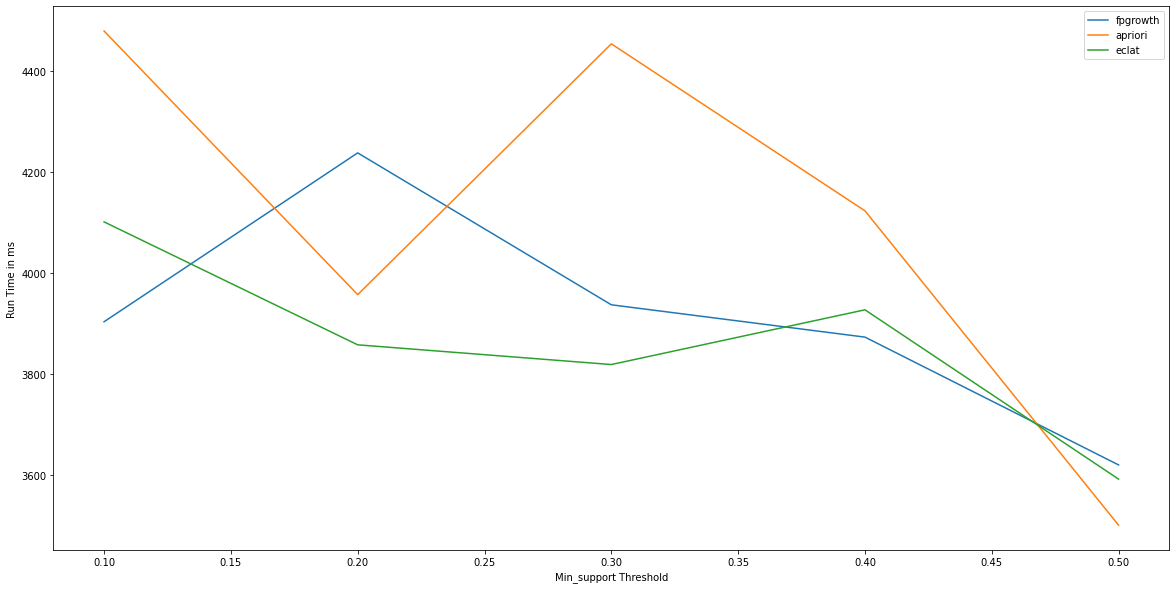

In [28]:
import matplotlib.pyplot as plt
import matplotlib
#import squarify
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=a,label="apriori")
sns.lineplot(x=l,y=e,label="eclat")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")
#plt.yscale('log')

In [25]:
import time
l=[1,2,3,4,5]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=1
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        count=0
        for r in eclat(data_arr2, supp=i, zmin=1):
            count+=1
        print(count)
        t2=time.perf_counter()
        #count+=1
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)

Testing with minsupp of:::::::::::::::::::: 1
116
2913.292404999993
Testing with minsupp of:::::::::::::::::::: 2
37
2033.2164720002766
Testing with minsupp of:::::::::::::::::::: 3
13
1564.0677370001868
Testing with minsupp of:::::::::::::::::::: 4
10
1597.0697709999513
Testing with minsupp of:::::::::::::::::::: 5
6
1405.4625090002446


In [26]:
import time
l=[1,2,3,4,5]
f=[]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=10
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        fpgrowth(data_arr2, supp=i, zmin=1)
        t2=time.perf_counter()
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)
    f.append(d)
   

Testing with minsupp of:::::::::::::::::::: 1
2726.8936744000257
Testing with minsupp of:::::::::::::::::::: 2
1955.3268741999545
Testing with minsupp of:::::::::::::::::::: 3
1597.6578501000404
Testing with minsupp of:::::::::::::::::::: 4
1547.2432132999074
Testing with minsupp of:::::::::::::::::::: 5
1467.2634761999689


In [27]:
import time
l=[1,2,3,4,5]
a=[]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=10
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        apriori(data_arr2, supp=i, zmin=1)
        t2=time.perf_counter()
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)
    a.append(d)

Testing with minsupp of:::::::::::::::::::: 1
2864.1112751000037
Testing with minsupp of:::::::::::::::::::: 2
2017.9561711001952
Testing with minsupp of:::::::::::::::::::: 3
1657.3404270000083
Testing with minsupp of:::::::::::::::::::: 4
1542.1136189999743
Testing with minsupp of:::::::::::::::::::: 5
1421.9503867000185


In [28]:
import time
l=[1,2,3,4,5]
e=[]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=10
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        eclat(data_arr2, supp=i, zmin=1)
        t2=time.perf_counter()
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)
    e.append(d)

Testing with minsupp of:::::::::::::::::::: 1
2872.090351800034
Testing with minsupp of:::::::::::::::::::: 2
2063.2089257999723
Testing with minsupp of:::::::::::::::::::: 3
1631.0412500999973
Testing with minsupp of:::::::::::::::::::: 4
1513.2661241000278
Testing with minsupp of:::::::::::::::::::: 5
1408.3820536999156


Text(0, 0.5, 'Run Time in ms')

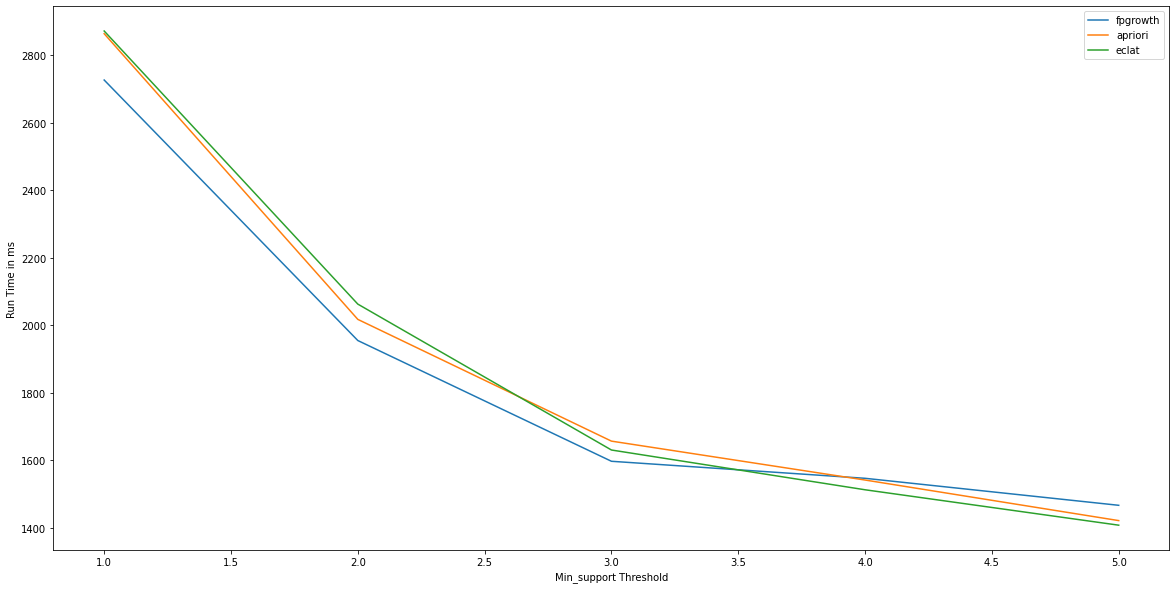

In [29]:
import matplotlib.pyplot as plt
import matplotlib
#import squarify
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=a,label="apriori")
sns.lineplot(x=l,y=e,label="eclat")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")
#plt.yscale('log')

In [30]:
import time
l=[7,8,9,10]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=1
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        count=0
        for r in eclat(data_arr2, supp=i, zmin=1):
            count+=1
        print(count)
        t2=time.perf_counter()
        #count+=1
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)

Testing with minsupp of:::::::::::::::::::: 7
4
1418.206941000335
Testing with minsupp of:::::::::::::::::::: 8
3
1294.3651579998914
Testing with minsupp of:::::::::::::::::::: 9
2
1259.616441000162
Testing with minsupp of:::::::::::::::::::: 10
2
1240.6911279999804


In [32]:
import time
l=[7,8,9,10]
f=[]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=10
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        fpgrowth(data_arr2, supp=i, zmin=1)
        t2=time.perf_counter()
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)
    f.append(d)

Testing with minsupp of:::::::::::::::::::: 7
1412.1915527000965
Testing with minsupp of:::::::::::::::::::: 8
1315.2901477999421
Testing with minsupp of:::::::::::::::::::: 9
1274.6079924000242
Testing with minsupp of:::::::::::::::::::: 10
1276.2640959000237


In [33]:
import time
l=[7,8,9,10]
a=[]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=10
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        apriori(data_arr2, supp=i, zmin=1)
        t2=time.perf_counter()
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)
    a.append(d)

Testing with minsupp of:::::::::::::::::::: 7
1383.8458213000195
Testing with minsupp of:::::::::::::::::::: 8
1291.4961260999917
Testing with minsupp of:::::::::::::::::::: 9
1262.7919796999322
Testing with minsupp of:::::::::::::::::::: 10
1208.0544237000595


In [34]:
import time
l=[7,8,9,10]
e=[]
for i in l:
    print("Testing with minsupp of::::::::::::::::::::",i)
    h=10
    x=[]
    for u in range (h):
        t1=time.perf_counter()
        eclat(data_arr2, supp=i, zmin=1)
        t2=time.perf_counter()
        t=(t2-t1)*1000
        x.append(t)
    x.sort()
    #print(x)
    d=sum(x)/h
    print(d)
    e.append(d)

Testing with minsupp of:::::::::::::::::::: 7
1366.1779256000045
Testing with minsupp of:::::::::::::::::::: 8
1273.885245199972
Testing with minsupp of:::::::::::::::::::: 9
1198.1795023999439
Testing with minsupp of:::::::::::::::::::: 10
1226.827441899968


Text(0, 0.5, 'Run Time in ms')

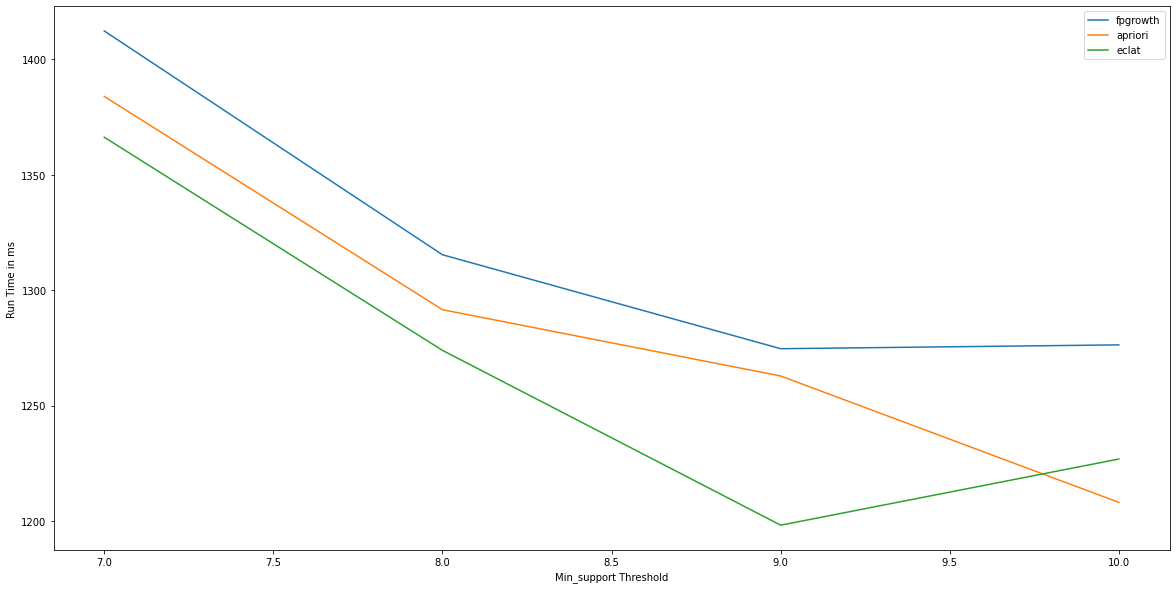

In [35]:
import matplotlib.pyplot as plt
import matplotlib
#import squarify
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=a,label="apriori")
sns.lineplot(x=l,y=e,label="eclat")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")
#plt.yscale('log')